In [60]:
# library
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances,silhouette_score,adjusted_rand_score,normalized_mutual_info_score
from sklearn import preprocessing

# data
data = pd.read_csv("C:/폐교/gn_total_v2.csv")
data.head()

,city,공원,경찰서 수,경찰공무원 1명당 담당 주민수(A/B),고령화예산,노인복지사업예산비중,노인 1인당 노인복지 예산 (천원),단독주택,아파트,연립주택,...,600~700,700만원 이상,silver_hall,jobforpay,ratio_old,stress,melancholy,poor_60,infra,station
0,합천군,6,19,275.634146,42.5,31.4,"2,032",87.6,7.5,2.5,...,0.8,0.4,1,6781,41.5,12.4,1.0,8781.0,76,350
1,함양군,33,8,293.607407,49.3,32.0,"2,074",82.3,9.4,0.3,...,0.8,1.6,5,5236,35.0,22.1,5.9,6780.5,70,293
2,함안군,47,11,408.074534,42.1,40.8,"2,765",78.0,17.5,2.6,...,0.8,2.3,1,6468,27.2,15.2,2.2,8375.5,73,397
3,하동군,27,10,304.405229,45.0,42.0,"2,943",84.4,9.4,3.8,...,0.8,1.9,4,6114,36.9,10.2,1.7,7917.0,80,308
4,통영시,60,11,521.444444,61.0,27.5,"2,296",25.8,63.8,2.6,...,2.4,2.1,4,10201,21.6,19.7,12.0,13210.5,194,429


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   18 non-null     object 
 1   공원                     18 non-null     int64  
 2   경찰서 수                  18 non-null     int64  
 3   경찰공무원 1명당 담당 주민수(A/B)  18 non-null     float64
 4   고령화예산                  18 non-null     float64
 5   노인복지사업예산비중             18 non-null     float64
 6   노인 1인당 노인복지 예산 (천원)    18 non-null     object 
 7   단독주택                   18 non-null     float64
 8   아파트                    18 non-null     float64
 9   연립주택                   18 non-null     float64
 10  다세대주택                  18 non-null     float64
 11  거주_기타                  18 non-null     float64
 12  100만원미만                18 non-null     float64
 13  100~200                18 non-null     float64
 14  200~300                18 non-null     float64
 15  300~400 

In [65]:
data["노인 1인당 노인복지 예산 (천원)"]=pd.to_numeric(data["노인 1인당 노인복지 예산 (천원)"].str.replace(",",""))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   18 non-null     object 
 1   공원                     18 non-null     int64  
 2   경찰서 수                  18 non-null     int64  
 3   경찰공무원 1명당 담당 주민수(A/B)  18 non-null     float64
 4   고령화예산                  18 non-null     float64
 5   노인복지사업예산비중             18 non-null     float64
 6   노인 1인당 노인복지 예산 (천원)    18 non-null     int64  
 7   단독주택                   18 non-null     float64
 8   아파트                    18 non-null     float64
 9   연립주택                   18 non-null     float64
 10  다세대주택                  18 non-null     float64
 11  거주_기타                  18 non-null     float64
 12  100만원미만                18 non-null     float64
 13  100~200                18 non-null     float64
 14  200~300                18 non-null     float64
 15  300~400 

In [66]:
data.columns

Index(['city', '공원', '경찰서 수', '경찰공무원 1명당 담당 주민수(A/B)', '고령화예산', '노인복지사업예산비중',
       '노인 1인당 노인복지 예산 (천원)', '단독주택', '아파트', '연립주택', '다세대주택', '거주_기타',
       '100만원미만', '100~200', '200~300', '300~400', '400~500', '500~600',
       '600~700', '700만원 이상', 'silver_hall', 'jobforpay', 'ratio_old',
       'stress', 'melancholy', 'poor_60', 'infra', 'station'],
      dtype='object')

# 표준화

In [67]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(data[data.columns.difference(['city'])])
std_df = pd.DataFrame(std_df, index=data[data.columns.difference(['city'])].index, 
columns=data[data.columns.difference(['city'])].columns)
std_df.head()

,100~200,100만원미만,200~300,300~400,400~500,500~600,600~700,700만원 이상,infra,jobforpay,...,경찰공무원 1명당 담당 주민수(A/B),경찰서 수,고령화예산,공원,노인 1인당 노인복지 예산 (천원),노인복지사업예산비중,다세대주택,단독주택,아파트,연립주택
0,0.678887,1.370775,-1.120464,-1.044382,-1.398853,-1.028850,-0.923048,-1.420193,-0.542876,-0.468260,...,-0.982267,0.899606,-0.329820,-0.815967,-1.686047,-1.218548,-0.331890,0.987029,-0.952791,-0.087061
1,0.007460,0.507594,0.335476,-0.847277,-0.386618,-0.436232,-0.923048,-0.560917,-0.560883,-0.583569,...,-0.879216,-0.690769,-0.292148,-0.578790,-1.582146,-1.161478,1.112809,0.770513,-0.874929,-1.318348
2,0.208888,1.102049,-1.287539,-0.748724,-1.019264,-0.584387,-0.923048,-0.059672,-0.551880,-0.491620,...,-0.222914,-0.257030,-0.332037,-0.455809,0.127264,-0.324453,-0.527120,0.594850,-0.542989,-0.031093
3,0.880315,0.434305,-0.595371,-0.305239,-0.544779,-0.386848,-0.923048,-0.346098,-0.530872,-0.518041,...,-0.817306,-0.401610,-0.315970,-0.631496,0.567605,-0.210313,-0.136661,0.856302,-0.874929,0.640518
4,-0.059682,-0.746462,0.860569,1.591895,-0.196823,-0.139924,0.861098,-0.202885,-0.188740,-0.213013,...,0.427097,-0.257030,-0.227329,-0.341613,-1.032958,-1.589502,1.932773,-1.537622,1.354398,-0.031093


In [68]:
from sklearn.decomposition import PCA

nc = 10

pca = PCA(n_components=nc)
pca_array = pca.fit_transform(std_df)
pca_df = pd.DataFrame(pca_array, 
                      columns=[f"pca{num+1}" for num in range(nc)])
pca_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-3.793101,2.143333,0.772616,0.640955,0.200989,-0.346337,1.238052,0.481264,1.310877,-0.018227
1,-2.411270,1.050820,2.735663,0.794070,1.053535,1.371321,-0.361293,-0.392207,-0.855469,-0.196600
2,-2.403323,0.759379,-0.378337,0.637227,-0.042027,0.215180,0.484010,0.441342,-0.117508,-0.359515
3,-2.716879,0.450577,-0.524681,-0.159928,-0.582264,-0.694974,0.214595,-0.140823,-0.398400,0.289103
4,1.434271,-2.028372,2.814455,0.869530,1.990400,-0.791324,-0.070806,-0.236965,0.789121,0.113039
5,9.564927,5.868859,-0.652477,-0.435894,-0.062716,-0.356101,-0.881079,-0.091129,0.280606,-0.007176
6,-2.331735,0.701277,4.009759,-0.672493,-1.859841,0.280989,-0.987112,0.816083,-0.080323,0.113527
7,3.777652,0.579312,1.103887,1.014398,-0.018336,-0.933699,1.913759,-0.429459,-0.811559,-0.121894
8,-3.504116,-0.150951,-2.474513,2.870835,-0.688812,-1.544915,-1.045898,0.131372,-0.385545,-0.389246
9,4.068040,-2.405750,-0.503017,-1.252906,-0.700661,-0.071724,0.702904,1.695428,-0.344780,0.028641


In [69]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(nc)]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,14.905886,0.521399,0.521399
pca2,4.430180,0.154965,0.676364
pca3,3.005425,0.105128,0.781493
pca4,1.586474,0.055494,0.836986
pca5,1.071564,0.037483,0.874469
pca6,0.887432,0.031042,0.905511
pca7,0.760326,0.026596,0.932107
pca8,0.477600,0.016706,0.948813
pca9,0.384612,0.013454,0.962266
pca10,0.337772,0.011815,0.974082


Text(0.5, 1.0, 'Scree plot')

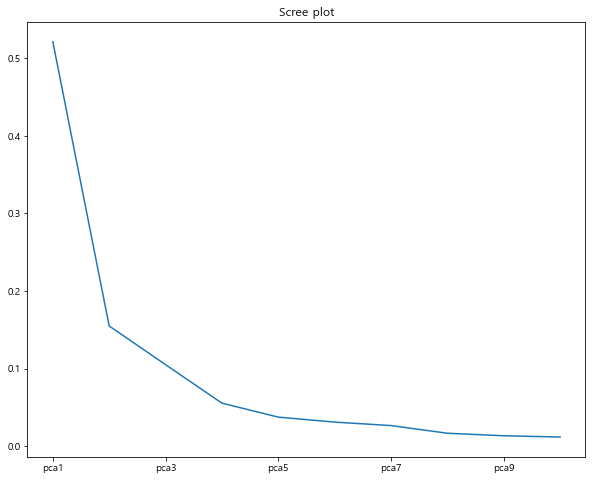

In [70]:
result['기여율'].plot.line()
plt.title('Scree plot')

In [71]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

Text(0.5, 1.0, '누적기여율')

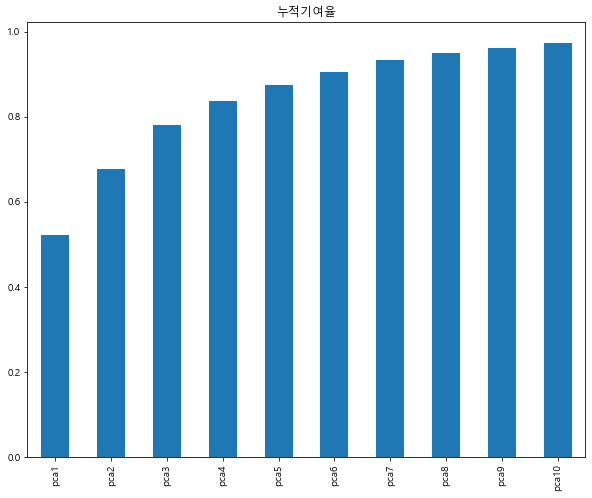

In [72]:
result['누적기여율'].plot.bar()
plt.title('누적기여율')

In [73]:
pca_out = PCA().fit(std_df)

pca_out.explained_variance_ratio_
np.cumsum(pca_out.explained_variance_ratio_)

array([0.52139932, 0.67636446, 0.78149251, 0.83698647, 0.87446917,
       0.90551104, 0.93210681, 0.94881298, 0.9622665 , 0.97408156,
       0.98338448, 0.99008185, 0.99396047, 0.99691386, 0.99880126,
       0.99957321, 1.        , 1.        ])

In [74]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = std_df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
variable,,,,,,,,,,,,,,,,,,
100~200,-0.169060,0.176404,-0.045560,-0.380634,0.328028,-0.198478,0.043359,0.201802,-0.200759,-0.185375,-0.212939,0.434892,-0.196326,-0.280119,-0.148122,-0.080452,0.088851,0.040635
100만원미만,-0.236663,0.145271,-0.116631,0.171502,-0.010596,0.042719,-0.090719,0.151563,0.187082,0.015558,0.030655,-0.017942,0.012857,0.278550,0.187223,0.088637,0.345577,0.074251
200~300,0.171575,-0.189346,0.219423,-0.286255,0.001556,-0.077677,-0.200777,-0.374074,0.003888,-0.354945,0.000746,-0.372169,-0.320261,-0.136401,0.138271,0.164211,0.017395,-0.033809
300~400,0.210162,-0.229927,0.146728,-0.072963,0.091009,-0.030049,-0.011847,-0.128666,0.221214,0.236946,0.214160,0.199135,0.075197,-0.340325,-0.281903,0.374697,-0.060792,0.104883
400~500,0.231382,-0.163964,-0.005888,-0.020536,-0.148437,0.131077,0.055720,0.160312,-0.332524,0.252584,-0.078723,-0.270297,-0.137214,-0.242841,0.046174,-0.149288,0.059747,0.044318
500~600,0.231523,-0.081529,-0.009911,0.082144,-0.233340,0.147155,0.241490,0.063264,-0.279489,0.182070,-0.264026,0.163279,-0.424127,0.324247,-0.114477,0.214917,-0.103925,-0.032424
600~700,0.211478,-0.142991,-0.077504,0.074102,-0.051494,0.234144,0.251298,-0.429660,0.326773,0.043919,-0.329387,0.232678,0.122184,-0.058142,0.103071,-0.407863,0.055791,0.056540
700만원 이상,0.238692,0.132914,0.015339,0.043058,-0.174490,0.044819,-0.049710,-0.206146,-0.249955,-0.106603,0.082201,0.350401,0.327876,0.038115,-0.294123,0.191816,0.178066,-0.024459
infra,0.240505,0.198196,-0.045014,-0.007261,-0.006489,-0.044515,-0.047207,0.094742,-0.003053,0.087013,0.009294,-0.092577,0.061333,-0.150680,0.167091,-0.157380,-0.048797,-0.538016


C:\Users\CPB06GameN\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


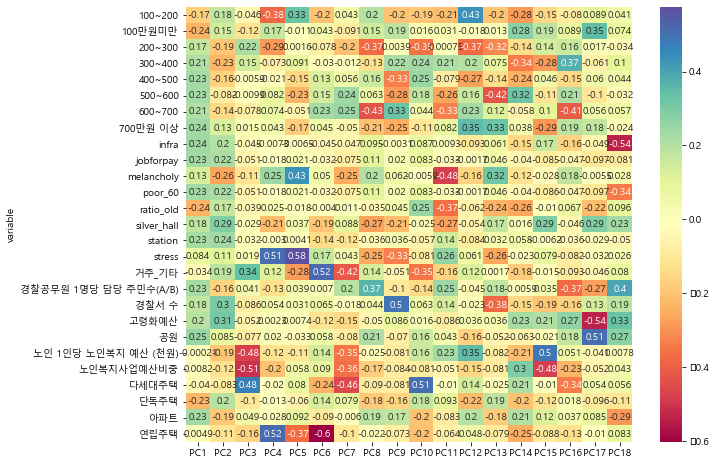

In [75]:
plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
printcipalComponents = pca.fit_transform(std_df)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2', 'pc3'],index = std_df.index)
principalDf.head()

,pc1,pc2,pc3
0,-3.793101,2.143333,0.772616
1,-2.411270,1.050820,2.735663
2,-2.403323,0.759379,-0.378337
3,-2.716879,0.450577,-0.524681
4,1.434271,-2.028372,2.814455


In [79]:
pca.explained_variance_ratio_

array([0.52139932, 0.15496514, 0.10512805])

In [80]:
sum(pca.explained_variance_ratio_)

0.781492509768717

# 3개의 주성분 분석을 이용한 시각화

C:\Users\CPB06GameN\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


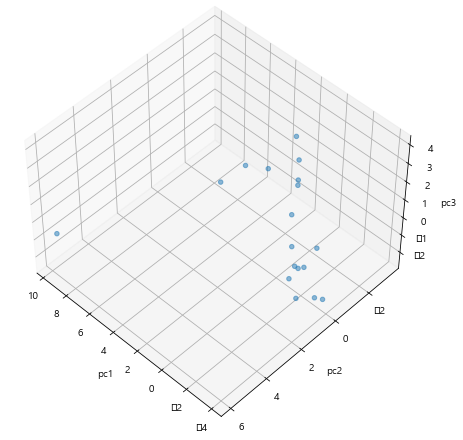

In [81]:
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(principalDf['pc1'],principalDf['pc2'],principalDf['pc3'],alpha=0.5)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.show()

# fitting k-medoids

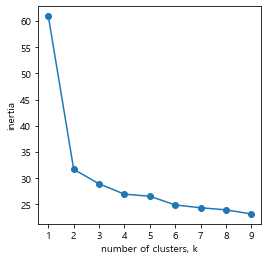

In [82]:
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value(적정 군집수)

ks=range(1,10)
inertias = []

for k in ks:
    model = KMedoids(n_clusters=k)
    model.fit(principalDf.iloc[:,:-1])
    inertias.append(model.inertia_)

# plot ks vs inertias
plt.figure(figsize=(4,4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [83]:
kMedoids = KMedoids(n_clusters = 4, random_state = 0)
kMedoids.fit(principalDf)
y_kmed = kMedoids.fit_predict(principalDf)

In [84]:
y_kmed

array([3, 1, 3, 3, 2, 2, 1, 2, 0, 2, 0, 2, 3, 0, 2, 3, 3, 2], dtype=int64)

In [85]:
kMedoids.inertia_

34.23015669236035

# silhouette to evaluate cluster

In [86]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 4, random_state = 2020)
kMedoids.fit(principalDf)
y_kmed = kMedoids.fit_predict(principalDf)
silhouette_avg = silhouette_score(principalDf, y_kmed)
print(silhouette_avg)

0.30417421174766485


In [87]:
sample_silhouette_values = silhouette_samples(principalDf, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.4821591413282241
0.666396992536699
0.25529978351025195


# use silhouette width to find number of cluster

In [88]:
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(principalDf)
    y_kmed = kMedoids.fit_predict(principalDf)
    silhouette_avg = silhouette_score(principalDf, y_kmed)
    sw.append(silhouette_avg)

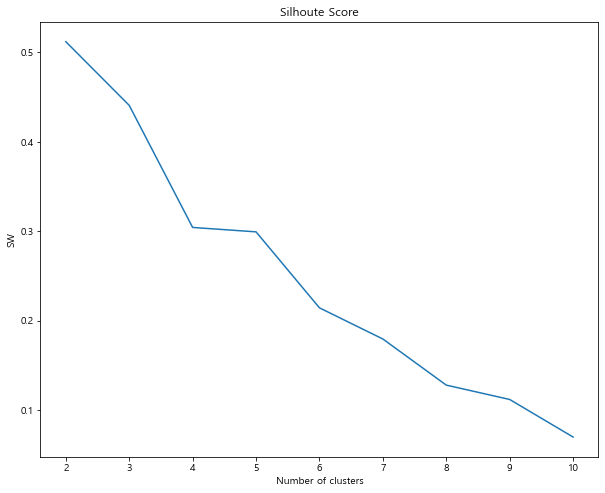

In [89]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

In [98]:
principalDf['city'] = data["city"]
principalDf.head()

,pc1,pc2,pc3,city
0,-3.793101,2.143333,0.772616,합천군
1,-2.411270,1.050820,2.735663,함양군
2,-2.403323,0.759379,-0.378337,함안군
3,-2.716879,0.450577,-0.524681,하동군
4,1.434271,-2.028372,2.814455,통영시


No handles with labels found to put in legend.
C:\Users\CPB06GameN\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


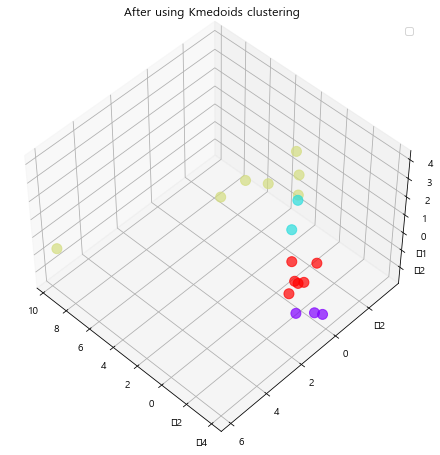

In [91]:
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
kmedoids = KMedoids(n_clusters=4, metric='euclidean', init='heuristic', max_iter=300, random_state=2020)
kmedoids.fit(principalDf)
y_kmedoids = kmedoids.predict(principalDf)
ax.scatter(principalDf.pc1, principalDf.pc2, principalDf.pc3, c = y_kmedoids, cmap = 'rainbow', alpha = 0.7, s=100)
plt.title("After using Kmedoids clustering")
plt.legend()
plt.show()

Text(0.5, 0, 'pca3')

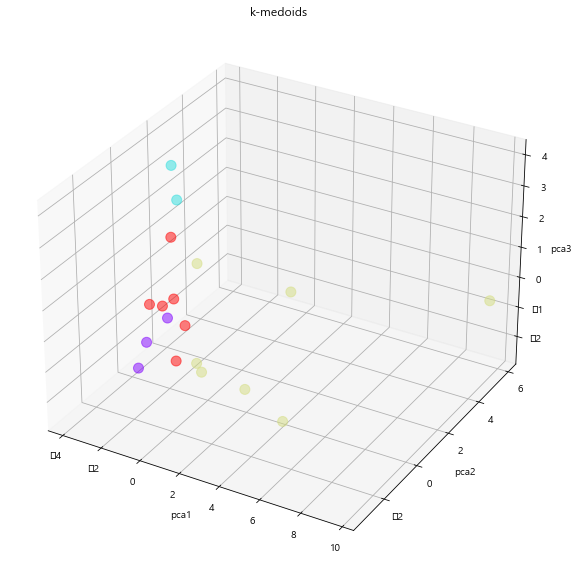

In [93]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = principalDf.pc1
y = principalDf.pc2
z = principalDf.pc3
ax.scatter(x, y, z, c = y_kmedoids, s= 100, alpha=0.5, cmap='rainbow')
ax.set_title('k-medoids')
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')

In [95]:
principalDf['city'] = data["city"]
principalDf.head()

,pc1,pc2,pc3,city
0,-3.793101,2.143333,0.772616,합천군
1,-2.411270,1.050820,2.735663,함양군
2,-2.403323,0.759379,-0.378337,함안군
3,-2.716879,0.450577,-0.524681,하동군
4,1.434271,-2.028372,2.814455,통영시


In [106]:
principalDf["labels"]=y_kmedoids
principalDf

,pc1,pc2,pc3,city,labels
0,-3.793101,2.143333,0.772616,합천군,3
1,-2.411270,1.050820,2.735663,함양군,1
2,-2.403323,0.759379,-0.378337,함안군,3
3,-2.716879,0.450577,-0.524681,하동군,3
4,1.434271,-2.028372,2.814455,통영시,2
5,9.564927,5.868859,-0.652477,창원시,2
6,-2.331735,0.701277,4.009759,창녕군,1
7,3.777652,0.579312,1.103887,진주시,2
8,-3.504116,-0.150951,-2.474513,의령군,0
9,4.068040,-2.405750,-0.503017,양산시,2


In [109]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     18 non-null     float64
 1   pc2     18 non-null     float64
 2   pc3     18 non-null     float64
 3   city    18 non-null     object 
 4   labels  18 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 848.0+ bytes


In [110]:
principalDf.sort_values(by = 'labels',ascending=False)

,pc1,pc2,pc3,city,labels
0,-3.793101,2.143333,0.772616,합천군,3
2,-2.403323,0.759379,-0.378337,함안군,3
3,-2.716879,0.450577,-0.524681,하동군,3
16,-1.064878,-0.063889,-0.608750,거창군,3
15,-2.654676,-0.323679,-0.079964,고성군,3
12,-1.435487,-0.206471,-1.795104,밀양시,3
11,1.748179,-2.485175,-0.083678,사천시,2
14,5.900606,-2.380871,-1.182471,김해시,2
9,4.068040,-2.405750,-0.503017,양산시,2
7,3.777652,0.579312,1.103887,진주시,2


In [111]:
principalDf["labels"].value_counts()

2    7
3    6
0    3
1    2
Name: labels, dtype: int64

In [112]:
pd.pivot_table(data=principalDf,index = 'labels',aggfunc='mean')

,pc1,pc2,pc3
labels,,,
0,-3.428892,0.497731,-1.923803
1,-2.371502,0.876048,3.372711
2,4.156861,-0.857792,0.234315
3,-2.344724,0.459875,-0.435703


C:\Users\CPB06GameN\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\CPB06GameN\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


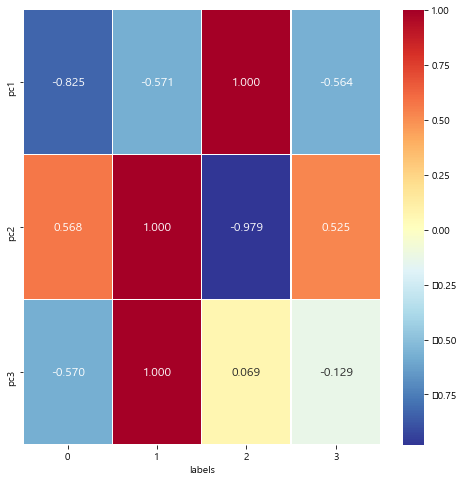

In [114]:
temp = principalDf.groupby(['labels']).mean()    
cluster_mean = temp.transpose()    
mean_table = cluster_mean.div(cluster_mean.max(axis=1), axis=0)    

plt.figure(figsize = (8, 8))   
annot_kws= {'fontsize':12}   
sns.heatmap(mean_table,     
			annot=True,     
            fmt='.3f',     
            linewidths = 0.1,     
            annot_kws = annot_kws,     
            cmap = 'RdYlBu_r')    
plt.show()